In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
# To avoid clutter in the output, suppress warnings
warnings.filterwarnings('ignore')

In [6]:
sns.set_style('whitegrid')

In [8]:
df = pd.read_csv('foodhub_order.csv')
original_df = df.copy()

In [9]:
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [11]:
df.sample(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1642,1477217,139639,Sushi of Gari 46,Japanese,29.15,Weekday,Not given,32,32
1763,1478106,129206,Shake Shack,American,29.15,Weekday,Not given,34,28
767,1477811,373152,Blue Ribbon Sushi,Japanese,24.30,Weekend,5,32,28
1681,1477077,40808,Shake Shack,American,12.18,Weekend,4,27,23
354,1476569,55334,Sushi of Gari Tribeca,Japanese,9.85,Weekend,Not given,26,17


In [10]:
# help me write observations for above data frame
# Observations:
# 1. The dataset contains information about food orders from various restaurants.
# 2. There are 9 columns in the dataset: order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, and delivery_time.
# 3. The first 5 rows show orders from different restaurants with varying cuisine types such as Korean, Japanese, Mexican, and American.
# 4. The cost of the orders ranges from $11.59 to $30.75 in the first 5 rows.
# 5. The 'rating' column contains both numeric and non-numeric values (e.g., 'Not given').
# 6. The 'day_of_the_week' column indicates whether the order was placed on a weekday or weekend.
# 7. The 'food_preparation_time' and 'delivery_time' columns are measured in minutes.

In [12]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [ ]:
# Observations:
# 1. The 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' columns are of type int64, indicating they contain integer values.
# 2. The 'cost_of_the_order' column is of type float64, indicating it contains floating-point numbers.
# 3. The 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating' columns are of type object, indicating they contain string values.

In [14]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Observations:
# 1. The dataset does not contain any missing values as all columns have 1898 non-null entries.
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [17]:
# missing values
df.isnull().any().any()

False

In [ ]:
# However d

In [16]:
# check statistcial summary for dataset
display(df.describe())

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
# Get the statistical summary for the 'food_preparation_time' column
food_preparation_summary = df['food_preparation_time'].describe()

# Observations:
# 1. The minimum time it takes for food to be prepared is {food_preparation_summary['min']} minutes.
# 2. The average time it takes for food to be prepared is {food_preparation_summary['mean']} minutes.
# 3. The maximum time it takes for food to be prepared is {food_preparation_summary['max']} minutes.

print(food_preparation_summary)

In [10]:
# Missing values in data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [18]:
# how many orders are not rated ?
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [19]:
# convert rating column to numeric type by replacing 'Not given' with NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [20]:
# check type of rating column now
df['rating'].dtype

dtype('float64')

In [21]:
df['rating'].nunique()

3

In [22]:
df['rating'].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [23]:
df['rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


In [24]:
# Top 5 restaurants with the highest average rating
df.groupby('restaurant_name')['rating'].mean().nlargest(5)

restaurant_name
'wichcraft            5.0
67 Burger             5.0
Anjappar Chettinad    5.0
Asuka Sushi           5.0
Balade                5.0
Name: rating, dtype: float64

In [25]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

> order_id and customer_id are unique identifiers (ie nominal values) and don't provide meaningful insights, so we'll exclude them from the univariate analysis.

### Univairate Anaysis

In [77]:
# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (15, 5)

In [78]:
sns.set_theme(style='whitegrid')

In [79]:
# Count the occurrences of each restaurant
restaurant_demand = df['restaurant_name'].value_counts()

In [80]:
restaurant_demand

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [93]:
# function that converts snakeCase into PascalCase
def snake_to_pascal(snake_str):
    components = snake_str.split('_')
    return ' '.join(x.title() for x in components)

def draw_countplot(x, rot=0, name=None, o=None):
    label = name if name else snake_to_pascal(x)
    priority = o if o is not None else df[x].value_counts().index
    sns.countplot(data=df, x=x, order=priority)
    plt.title(f'Bar Graph {label}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.xticks(rotation=rot)
    plt.show()

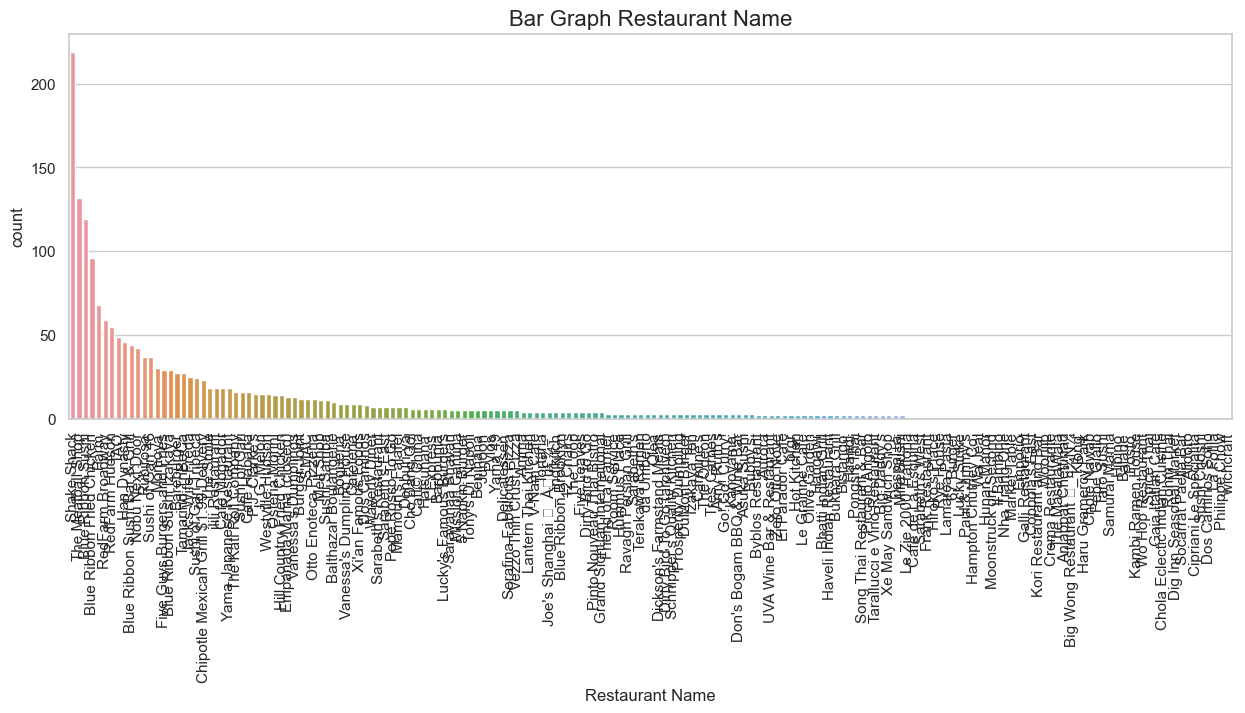

In [85]:
# bargraph for catehorical variable 'restaurant_name' (string)
draw_countplot('restaurant_name', rot=90)

In [94]:
top_n = 10
top_restaurants = df['restaurant_name'].value_counts().nlargest(top_n).index
top_restaurants

Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway',
       'RedFarm Hudson', 'TAO', 'Han Dynasty',
       'Blue Ribbon Sushi Bar & Grill'],
      dtype='object')

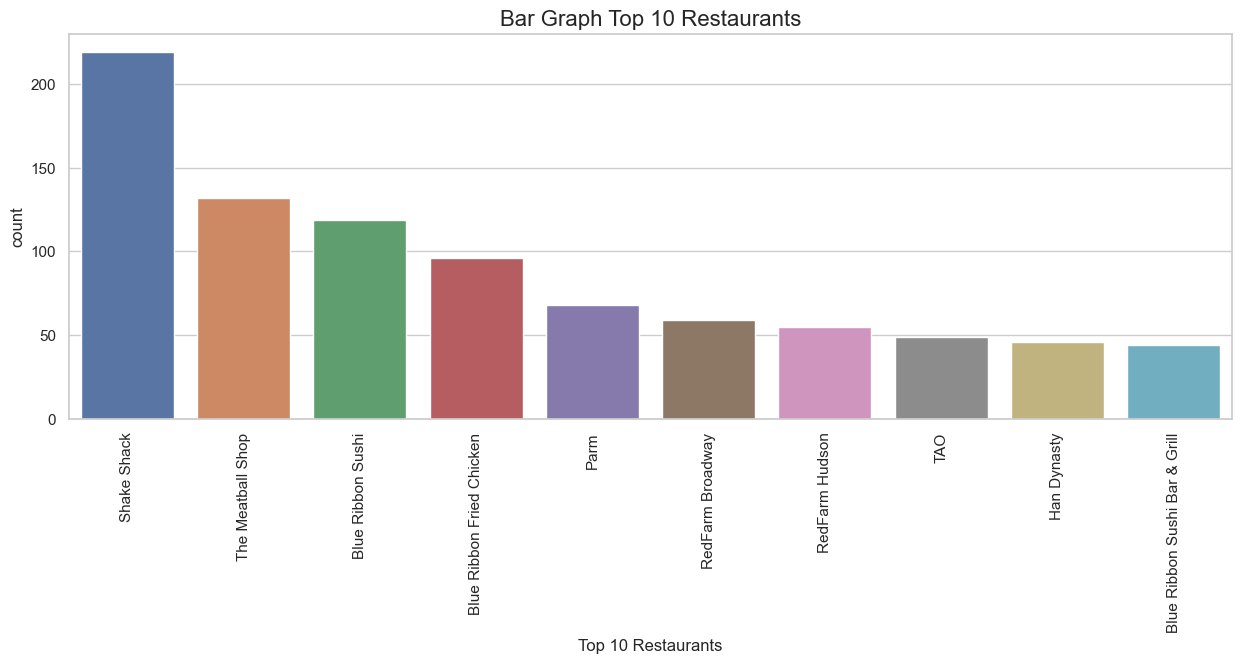

In [95]:
draw_countplot('restaurant_name', rot=90, name='Top 10 Restaurants', o=top_restaurants)

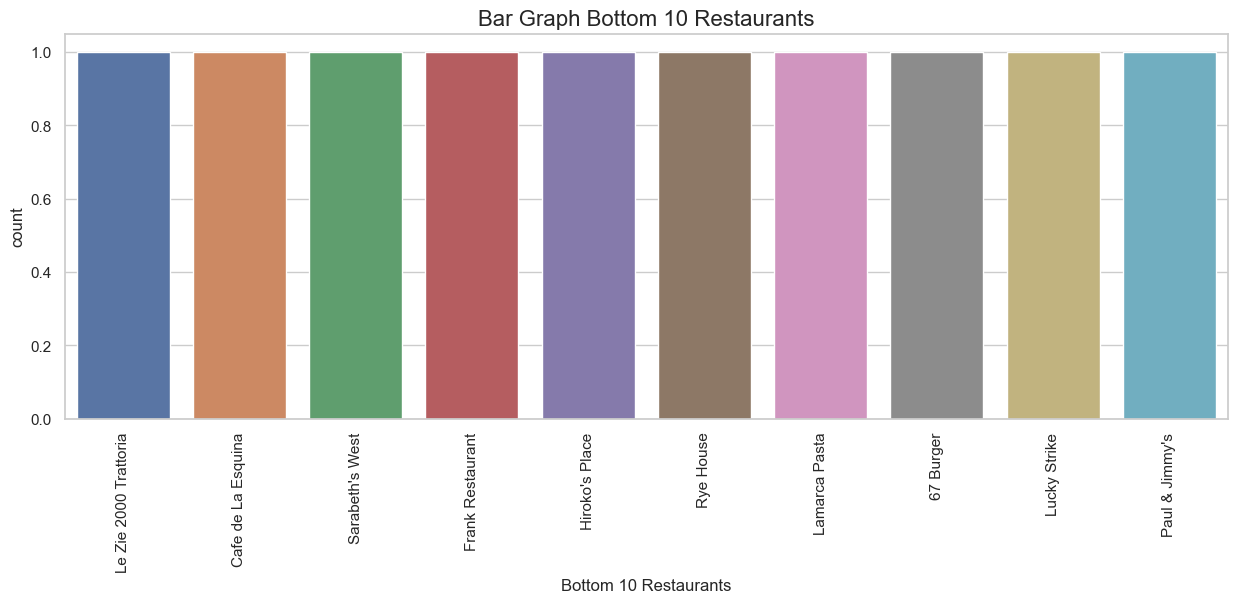

In [96]:
bottom_restaurants = df['restaurant_name'].value_counts().nsmallest(top_n).index
draw_countplot('restaurant_name', rot=90, name='Bottom 10 Restaurants', o=bottom_restaurants)

Graph seems to be too cluttered due to too many categories, lets try to discard few of them

In [99]:
df[x].value_counts().describe()

count    178.000000
mean      10.662921
std       24.047008
min        1.000000
25%        1.000000
50%        3.000000
75%        8.750000
max      219.000000
Name: restaurant_name, dtype: float64

Text(0.5, 0, 'Number of Orders')

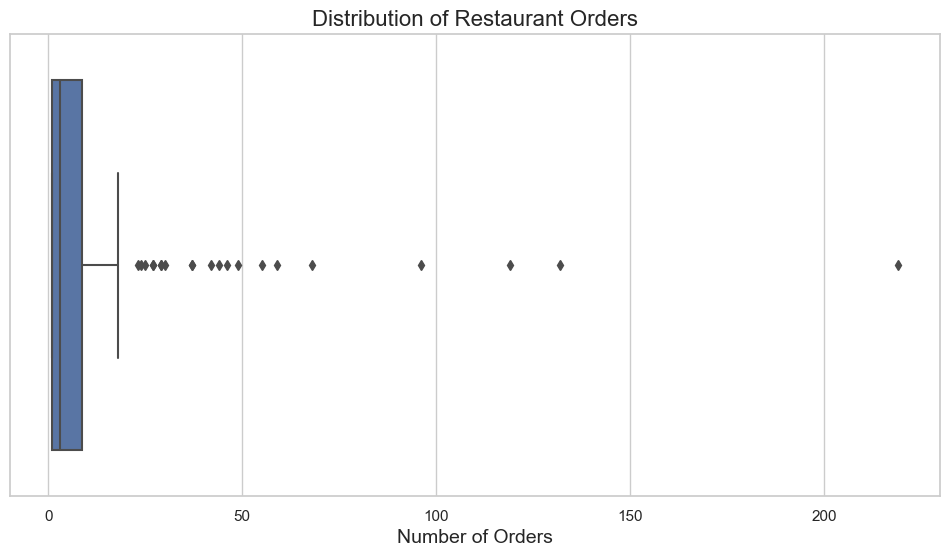

In [42]:
freqs = df[x].value_counts()
# boxplot for freqs
#plt.figure(figsize=(12, 6))
sns.boxplot(x=freqs)
plt.title('Distribution of Restaurant Orders', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)

In [50]:
def calc_iqr(ser):
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    return (Q1, Q3)

In [54]:
calc_iqr(freqs)

(1.0, 8.75)

In [55]:
# df count where freqs[restaurant_names] is greater than 10
df[df['restaurant_name'].isin(freqs[freqs > 10].index)].shape


(1494, 9)

In [58]:
df.shape

(1898, 9)

In [59]:
1898 - 1494, (404 / 1898) * 100

(404, 21.285563751317177)

Observation: Only 400 (ie approx 20%) restaurants have more than 10 orders

In [60]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

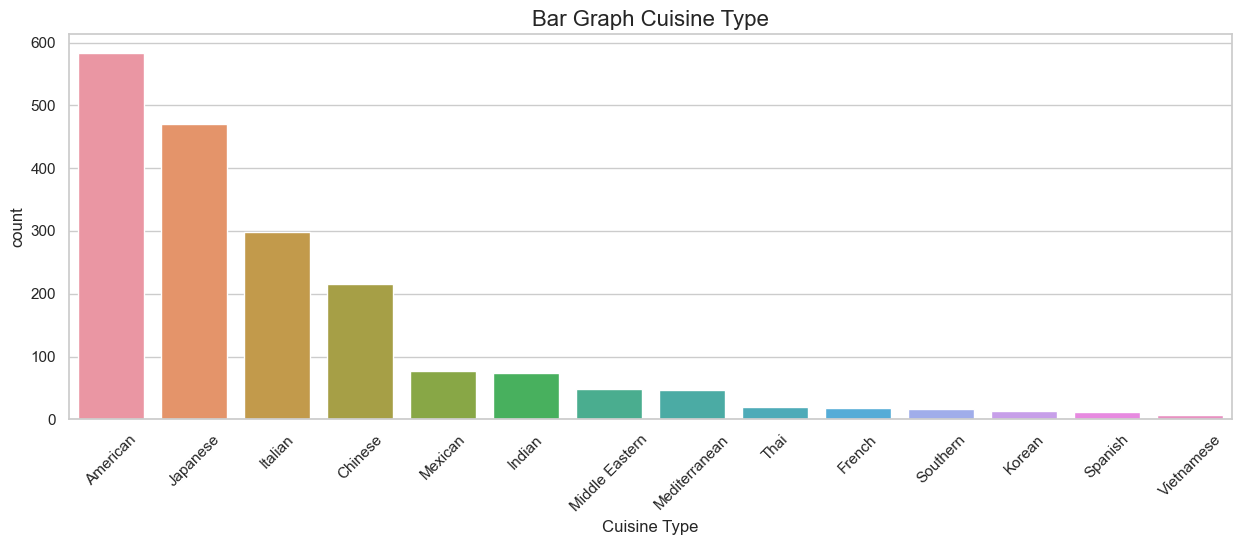

In [76]:
plt.figure(figsize=(15, 5))
draw_countplot('cuisine_type', rot=45)

In [100]:
# Observations:
# 1. The countplot for 'cuisine_type' shows the distribution of different types of cuisines in the dataset.
# 2. The most common cuisine types are American, Japanese, and Italian.
# 3. There are very fewer orders for cuisines like Korean, Spanish, and Vietnamese.
# 4. The distribution indicates a higher preference for certain cuisines among customers,
#  Hence restaurant should focus on such cuisines to attract more customers.

In [101]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Cost of the Orders

In [102]:
x = 'cost_of_the_order'

In [104]:
q1, q3 = calc_iqr(df[x])
q3-q1

10.2175

Obsv:
Half of all the orders cost somewhere between 10 units more or less than typical usual price

In [135]:
def draw_histplot(x, bins="auto"):
    label = snake_to_pascal(x)
    sns.histplot(data=df, x=x, bins=bins, kde=True, color='teal')
    plt.title(f'Histogram of {label}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.ylabel('frequeuncy', fontsize=12)
    plt.show()

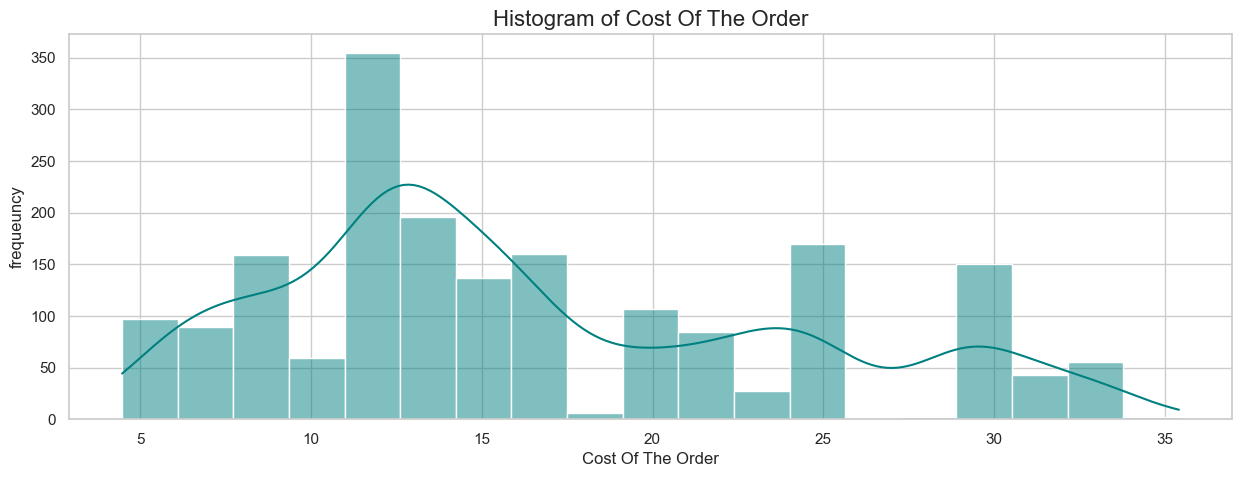

In [136]:
draw_histplot(x)

In [137]:
# Observations:
# 1. The histogram for 'Cost of the Order' shows the distribution of order costs in the dataset.
# 2. The distribution appears to be right-skewed, indicating that most orders are relatively inexpensive, with fewer high-cost orders.
# 3. The majority of orders cost between $10 and $20.
# 4. There are some outliers with significantly higher costs, which could be due to large or multiple orders.
# 5. The presence of a KDE (Kernel Density Estimate) line helps visualize the probability density of the order costs.

In [138]:
def draw_boxplot(x):
    label = snake_to_pascal(x)
    sns.boxplot(data=df, x=x, color='salmon')
    plt.title(f'Boxplot of {label}', fontsize=16)
    plt.xlabel(label, fontsize=12)
    plt.show()

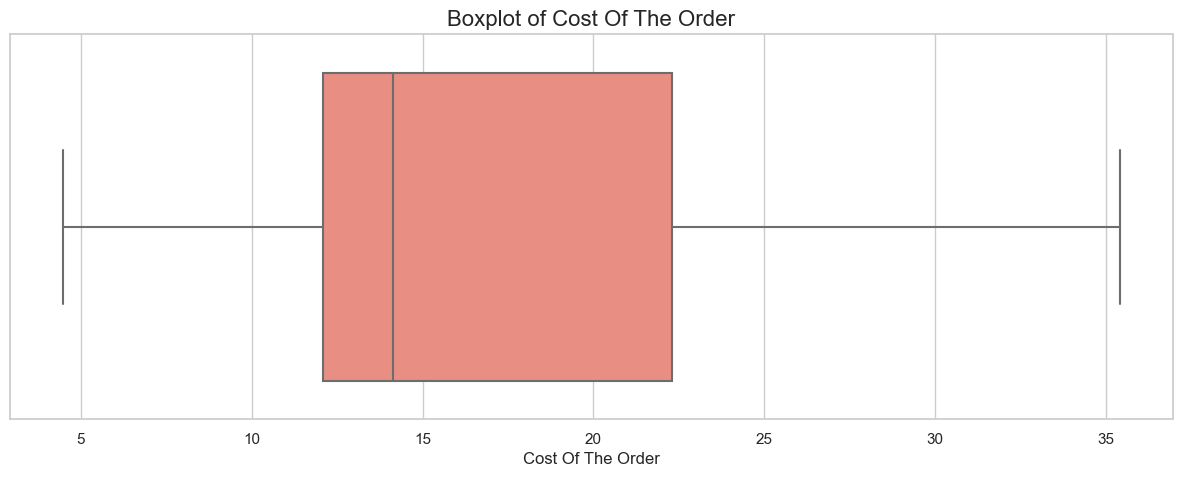

In [139]:
draw_boxplot(x)

(Maybe this can be kept with calc_iqr() analysis)

In [140]:
# Observations:
# 1. The boxplot for 'Cost of the Order' shows the distribution of order costs in the dataset.
# 2. The median cost of the orders is around 15 units.
# 3. The interquartile range (IQR) is approximately 10 units, indicating that the middle 50% of the orders cost between 12.08 and 22.30 units.
# 4. There are several outliers with higher costs, which could be due to large or multiple orders.
# 5. The presence of outliers suggests that while most orders are within a certain range, there are some orders that are significantly more expensive.

In [141]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [144]:
x = 'day_of_the_week'
df[x].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

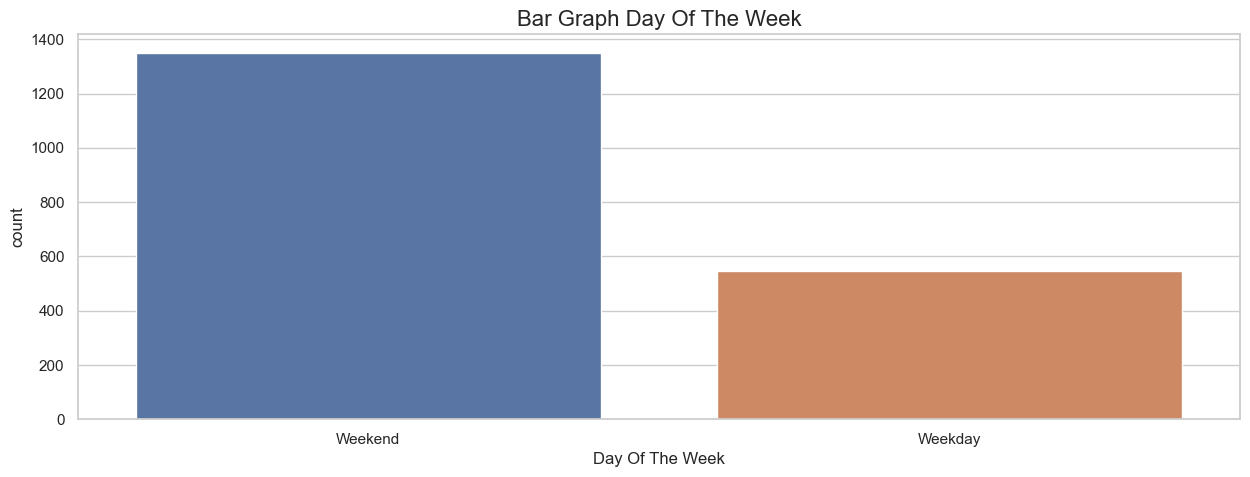

In [145]:
draw_countplot(x)

In [147]:
day_counts = df[x].value_counts()

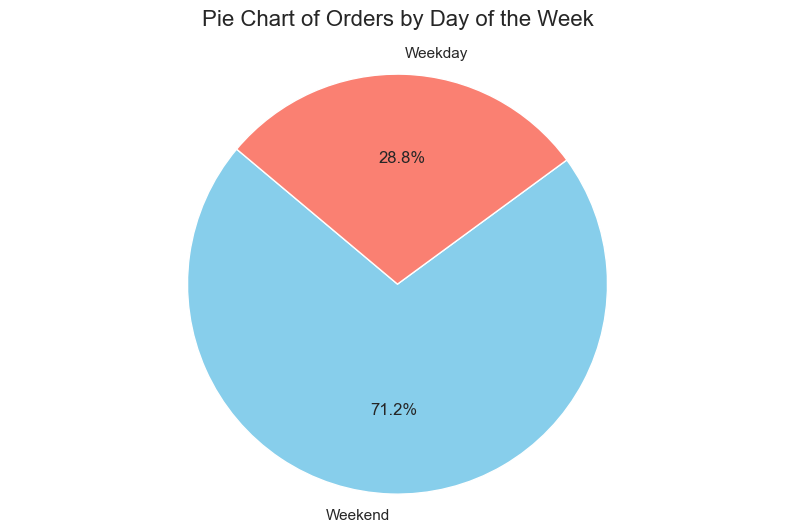

In [149]:
# draw pie chart for day of the week
plt.figure(figsize=(10, 6))
plt.title('Pie Chart of Orders by Day of the Week', fontsize=16, pad=20)
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.axis('equal')
plt.show()

In [150]:
# Observations:
# 1. The pie chart for 'Orders by Day of the Week' shows the distribution of orders between weekdays and weekends.
# 2. The majority of orders are placed on weekends, accounting for approximately 71.2% of the total orders.
# 3. Weekday orders make up the remaining 28.8% of the total orders.
# 4. This indicates a higher demand for food orders during weekends compared to weekdays.
# 5. Restaurants may consider increasing their staff and resources during weekends to handle the higher volume of orders.

In [151]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [159]:

def draw_pieplot(x):
    label = snake_to_pascal(x)
    counts = df[x].value_counts()
    plt.figure(figsize=(10, 6))
    plt.title(f'Pie Chart of {label}', fontsize=16, pad=20)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()

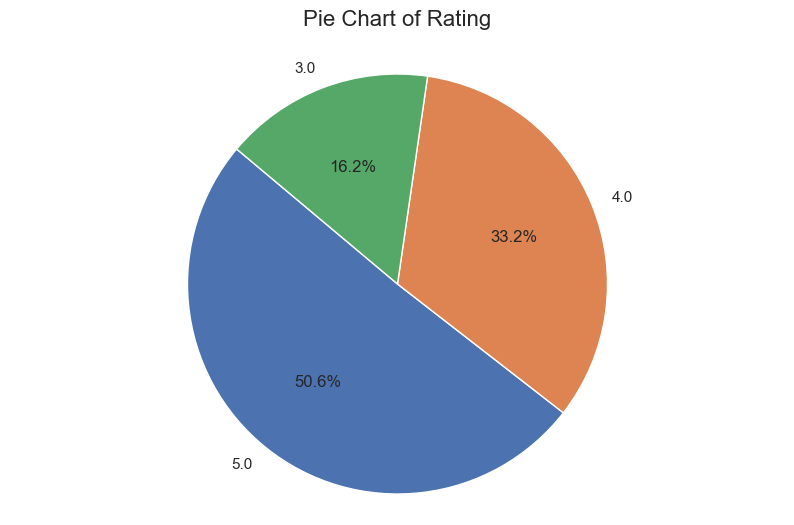

In [160]:
x = 'rating'
draw_pieplot(x)

In [161]:
df[x].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [162]:
# Observations:
# 1. The pie chart for 'Rating' shows the distribution of ratings given by customers.
# 2. A significant portion of the ratings are 'Not given', indicating that many customers did not provide a rating.
# 3. Among the given ratings, the most common rating is 5, followed by 4 and 3.
# 4. The distribution suggests that customers who do rate their orders tend to give higher ratings.
# 5. The presence of many 'Not given' ratings could indicate a need for encouraging customers to provide feedback.